# Taylor Woodington
# Austin Animal Center
# Shelters Analysis

In [21]:
# Necessary Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [22]:
# Load Dataset
data = pd.read_csv(r'C:\Users\Shaun\Downloads\animalshelter\aac_shelter_outcomes.csv')

# Ensure data has loaded
print(data.head(10))

  age_upon_outcome animal_id animal_type                    breed  \
0          2 weeks   A684346         Cat   Domestic Shorthair Mix   
1           1 year   A666430         Dog               Beagle Mix   
2           1 year   A675708         Dog                 Pit Bull   
3          9 years   A680386         Dog  Miniature Schnauzer Mix   
4         5 months   A683115       Other                  Bat Mix   
5         4 months   A664462         Dog           Leonberger Mix   
6           1 year   A693700       Other             Squirrel Mix   
7          3 years   A692618         Dog  Chihuahua Shorthair Mix   
8          1 month   A685067         Cat   Domestic Shorthair Mix   
9         3 months   A678580         Cat   Domestic Shorthair Mix   

              color        date_of_birth             datetime  \
0      Orange Tabby  2014-07-07T00:00:00  2014-07-22T16:04:00   
1       White/Brown  2012-11-06T00:00:00  2013-11-07T11:47:00   
2        Blue/White  2013-03-31T00:00:00  201

In [23]:
# Clean up the dataset 
# Remove rows where the animal_type is "other" 
# Cannot use data without knowing what type of animal it is
data = data[data['animal_type'] != 'Other']

In [24]:
# Handle age column
# Convert age_upon_outcome to numerical age in days
def convert_age_to_days(age):
    if pd.isnull(age):
        return np.nan
    age_dict = {'year': 365, 'years': 365, 'month': 30, 'months': 30, 'week': 7, 'weeks': 7, 'day': 1, 'days': 1}
    parts = age.split()
    return int(parts[0]) * age_dict[parts[1]]

data['age_in_days'] = data['age_upon_outcome'].apply(convert_age_to_days)

# Convert age_in_days to years
data['age_in_years'] = data['age_in_days'] / 365

data = data.drop('age_upon_outcome', axis=1)

# Calculate the average age in years
average_age_years = data['age_in_years'].mean()

print(f"The average age of animals in the shelter is {average_age_years:.2f} years.")

The average age of animals in the shelter is 2.18 years.


In [8]:
# Drop unimportant columns which will not be used
data = data.drop(columns=['name', 'date_of_birth', 'outcome_subtype','age_in_days'])
                 
# Ensure the above was done to the dataset
print(data.head(10))

   animal_id animal_type                     breed             color  \
0    A684346         Cat    Domestic Shorthair Mix      Orange Tabby   
1    A666430         Dog                Beagle Mix       White/Brown   
2    A675708         Dog                  Pit Bull        Blue/White   
3    A680386         Dog   Miniature Schnauzer Mix             White   
5    A664462         Dog            Leonberger Mix       Brown/White   
7    A692618         Dog   Chihuahua Shorthair Mix             Brown   
8    A685067         Cat    Domestic Shorthair Mix  Blue Tabby/White   
9    A678580         Cat    Domestic Shorthair Mix       White/Black   
10   A675405         Cat  Domestic Medium Hair Mix       Black/White   
11   A673652         Dog    Papillon/Border Collie       Black/White   

               datetime            monthyear     outcome_type  \
0   2014-07-22T16:04:00  2014-07-22T16:04:00         Transfer   
1   2013-11-07T11:47:00  2013-11-07T11:47:00         Transfer   
2   2014-06-

In [9]:
# Missing Values
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
animal_id           0
animal_type         0
breed               0
color               0
datetime            0
monthyear           0
outcome_type        7
sex_upon_outcome    2
age_in_years        7
dtype: int64


In [10]:
# Drop rows with missing values for the outcome type, gender, and age
data = data.dropna(subset=['outcome_type','sex_upon_outcome','age_in_years'])

# Double Check Missing Values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
animal_id           0
animal_type         0
breed               0
color               0
datetime            0
monthyear           0
outcome_type        0
sex_upon_outcome    0
age_in_years        0
dtype: int64


C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


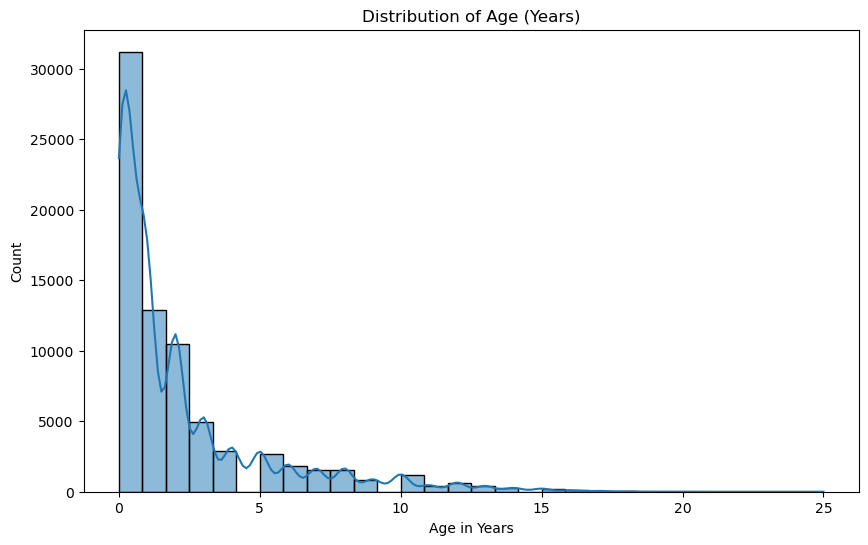

In [11]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age_in_years'], bins=30, kde=True)
plt.title('Distribution of Age (Years)')
plt.xlabel('Age in Years')
plt.show()

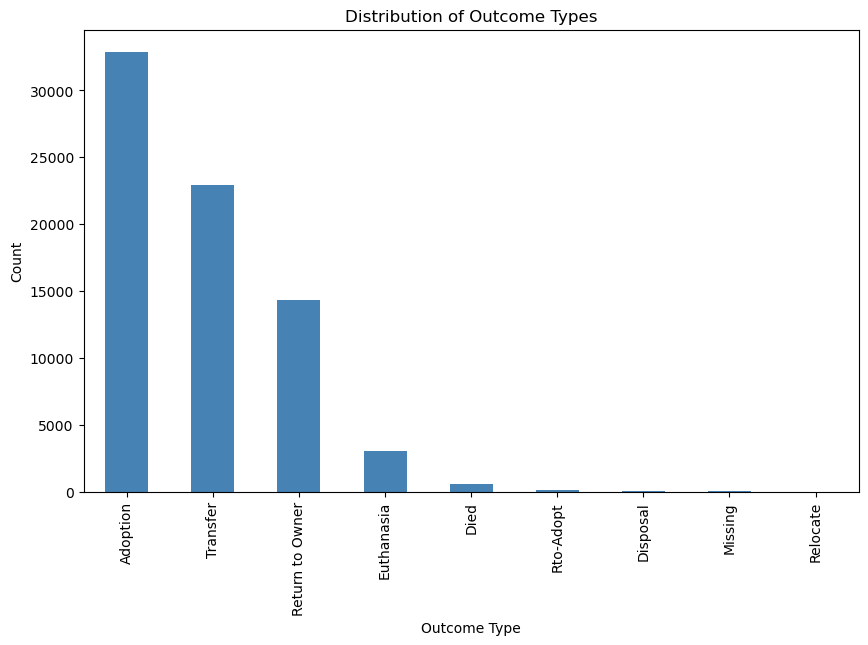

Number of individuals with outcome_type 'Transfer': 22937


In [12]:
# Count of outcomes
plt.figure(figsize=(10, 6))
data['outcome_type'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.show()


# Count the number of individuals with outcome_type as "Transfer"
transfer_count = data[data['outcome_type'] == 'Transfer'].shape[0]

print(f"Number of individuals with outcome_type 'Transfer': {transfer_count}")

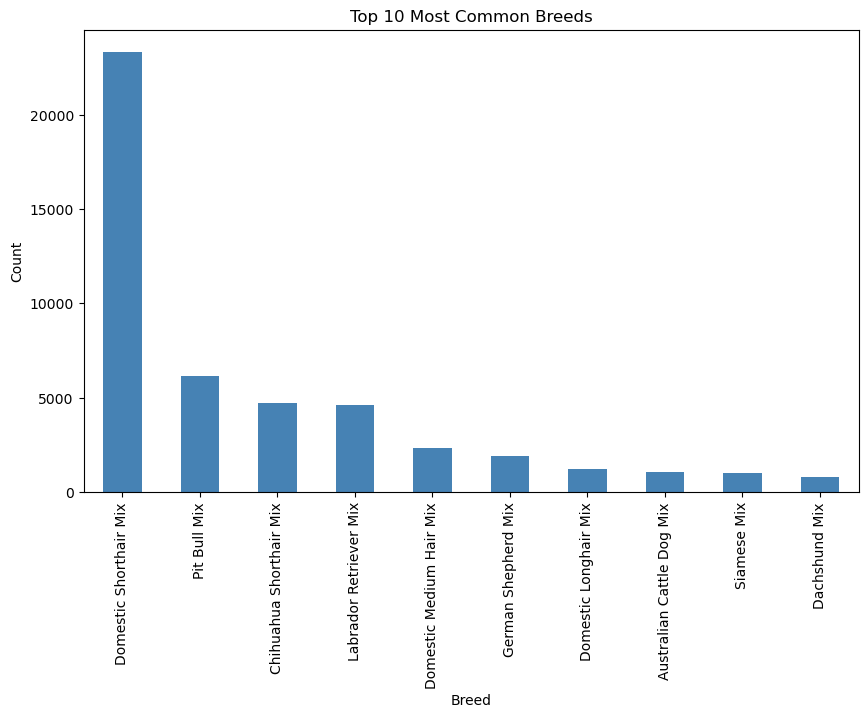

In [13]:
# Analyzing breed
most_common_breeds = data['breed'].value_counts().head(10)
plt.figure(figsize=(10, 6))
most_common_breeds.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Common Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.show()

In [14]:
# Extract month and year from monthyear column
data['datetime'] = pd.to_datetime(data['monthyear'], errors='coerce')
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year

Coefficient: -0.02584587917888549
Intercept: 0.5010784228657589


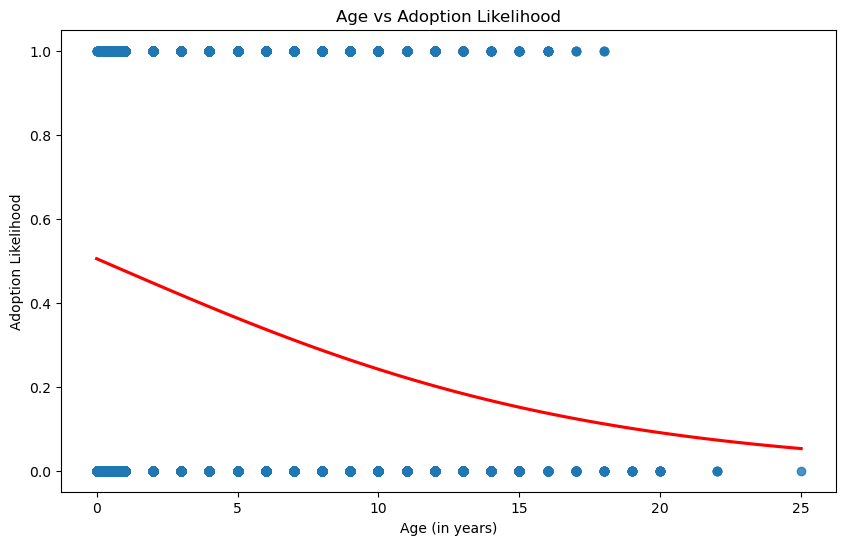

In [15]:
from sklearn.linear_model import LinearRegression

# Create a binary target for adoption
data['adopted'] = (data['outcome_type'] == 'Adoption').astype(int)

# Linear regression: Age vs Adoption
X = data[['age_in_years']]
y = data['adopted']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient and intercept
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age_in_years', y='adopted', data=data, logistic=True, ci=None, line_kws={"color": "red"})
plt.title("Age vs Adoption Likelihood")
plt.xlabel("Age (in years)")
plt.ylabel("Adoption Likelihood")
plt.show()


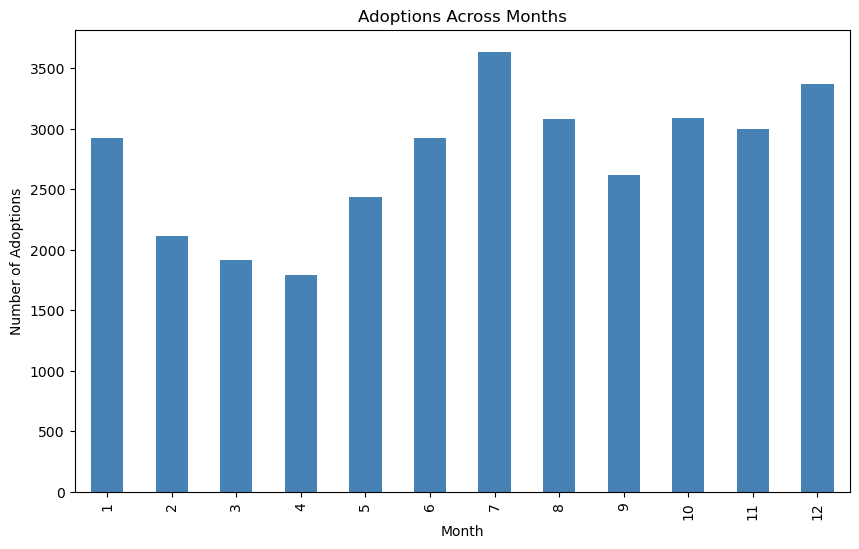

In [16]:
# Monthly adoption trend
monthly_adoptions = data[data['outcome_type'] == 'Adoption'].groupby('month').size()
plt.figure(figsize=(10, 6))
monthly_adoptions.plot(kind='bar', color='steelblue')
plt.title('Adoptions Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Adoptions')
plt.show()


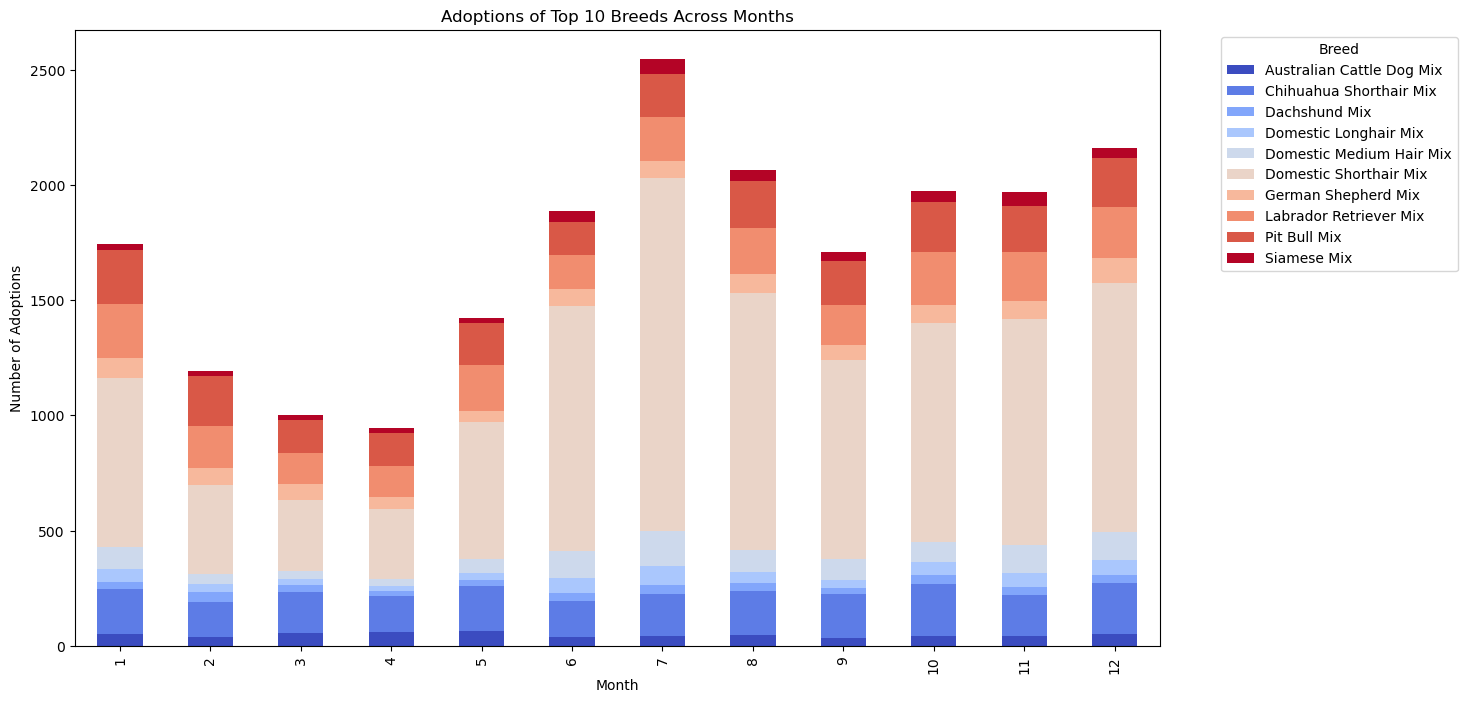

In [17]:
# Filter for top 10 breeds
top_breeds = data['breed'].value_counts().head(10).index
filtered_data = data[(data['breed'].isin(top_breeds)) & (data['outcome_type'] == 'Adoption')]

# Group by month and breed
breed_monthly_adoptions = filtered_data.groupby(['month', 'breed']).size().unstack()

# Plot
breed_monthly_adoptions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Adoptions of Top 10 Breeds Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Adoptions')
plt.legend(title='Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Shaun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.68      0.75      8272
           1       0.67      0.82      0.74      6527

    accuracy                           0.74     14799
   macro avg       0.75      0.75      0.74     14799
weighted avg       0.76      0.74      0.74     14799

                                        Feature  Coefficient  \
2039             sex_upon_outcome_Spayed Female     3.396671   
2038             sex_upon_outcome_Neutered Male     3.180277   
3                               animal_type_Dog    -2.835760   
2                               animal_type_Cat    -2.312240   
2040                   sex_upon_outcome_Unknown    -2.262764   
...                                         ...          ...   
946              breed_English Bulldog/Pit Bull     0.000000   
1369               breed_Mastiff/Dutch Shepherd     0.000000   
955   breed_English Coonhound/Italian Greyhound     0.000000   
1359                         bree

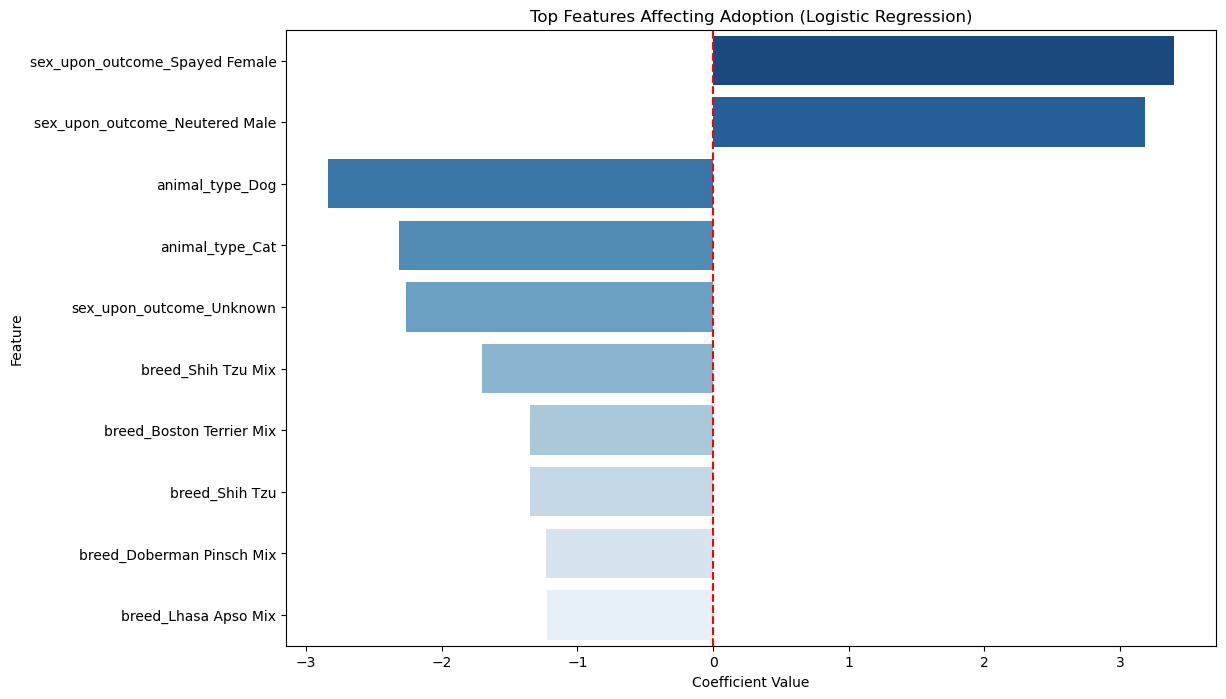

In [18]:
# Prepare data for logistic regression
X = pd.get_dummies(data[['age_in_years', 'animal_type', 'breed', 'sex_upon_outcome', 'color', 'month']], drop_first=True)
y = data['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Retrieve model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort coefficients by their absolute value
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top features affecting adoption
print(coefficients)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot top features by absolute coefficient
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(10), palette='Blues_r')
plt.title('Top Features Affecting Adoption (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--')
plt.show()